<a href="https://colab.research.google.com/github/LinzStearns/CO_real_estate/blob/main/ML_model_LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [203]:
# Load in CSV as a DataFrame
df = pd.read_csv(Path('/content/clean_housing.csv'))
df.head(10)

,SCHEDNUM,SITUS_CITY,SITUS_STATE,APPRAISED_TOTAL_VALUE,D_CLASS_CN,SALE_YEAR,SALE_PRICE
0,2.332000e+11,DENVER,CO,1621400,RESIDENTIAL-CONDOMINIUM,2019,1500000
1,5.122120e+11,DENVER,CO,1350500,RESIDENTIAL-ROWHOUSE,2018,1500000
2,5.125140e+11,DENVER,CO,1258600,RESIDENTIAL-ROWHOUSE,2021,1500000
3,5.121140e+11,DENVER,CO,1616000,RESIDENTIAL-ROWHOUSE,2020,1500000
4,2.331200e+11,DENVER,CO,1357100,RESIDENTIAL-CONDOMINIUM,2021,1500000
5,5.362110e+11,DENVER,CO,1226900,RESIDENTIAL-CONDOMINIUM,2021,1500000
6,5.122280e+11,DENVER,CO,1209400,RESIDENTIAL-CONDOMINIUM,2021,1500000
7,2.332000e+11,DENVER,CO,1621400,RESIDENTIAL-CONDOMINIUM,2019,1500000
8,5.122120e+11,DENVER,CO,1350500,RESIDENTIAL-ROWHOUSE,2018,1500000
9,5.125140e+11,DENVER,CO,1258600,RESIDENTIAL-ROWHOUSE,2021,1500000


In [204]:
df.dropna()

,SCHEDNUM,SITUS_CITY,SITUS_STATE,APPRAISED_TOTAL_VALUE,D_CLASS_CN,SALE_YEAR,SALE_PRICE
0,2.332000e+11,DENVER,CO,1621400,RESIDENTIAL-CONDOMINIUM,2019,1500000
1,5.122120e+11,DENVER,CO,1350500,RESIDENTIAL-ROWHOUSE,2018,1500000
2,5.125140e+11,DENVER,CO,1258600,RESIDENTIAL-ROWHOUSE,2021,1500000
3,5.121140e+11,DENVER,CO,1616000,RESIDENTIAL-ROWHOUSE,2020,1500000
4,2.331200e+11,DENVER,CO,1357100,RESIDENTIAL-CONDOMINIUM,2021,1500000
...,...,...,...,...,...,...,...
67429,6.274020e+11,DENVER,CO,118200,RESIDENTIAL-CONDOMINIUM,2019,102000
67430,6.274020e+11,DENVER,CO,118200,RESIDENTIAL-CONDOMINIUM,2020,102000
67431,6.151050e+11,DENVER,CO,141400,RESIDENTIAL-CONDOMINIUM,2020,101500
67432,6.151050e+11,DENVER,CO,141400,RESIDENTIAL-CONDOMINIUM,2020,101500


In [205]:
new_df = df.drop(['SITUS_CITY', 'SITUS_STATE', 'D_CLASS_CN', 'SCHEDNUM'], axis=1)
new_df.head(10)

,APPRAISED_TOTAL_VALUE,SALE_YEAR,SALE_PRICE
0,1621400,2019,1500000
1,1350500,2018,1500000
2,1258600,2021,1500000
3,1616000,2020,1500000
4,1357100,2021,1500000
5,1226900,2021,1500000
6,1209400,2021,1500000
7,1621400,2019,1500000
8,1350500,2018,1500000
9,1258600,2021,1500000


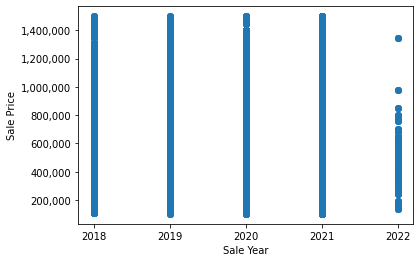

In [206]:
# Visual to inspect relationship
plt.scatter(new_df.SALE_YEAR, new_df.SALE_PRICE)
plt.xlabel('Sale Year')
plt.ylabel('Sale Price')
plt.xticks(np.arange(min(new_df.SALE_YEAR), max(new_df.SALE_YEAR)+1, 1.0))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.show()

In [207]:
# Independent variable located on X axis (variables that potentially impact housing cost - population, inflation rate, month)
X = df.SALE_YEAR.values.reshape(-1, 1)

In [209]:
# Examine shape of X to ensure proper formatting for scikit learn
X.shape

(67434, 1)

In [210]:
# Dependent variable located on the Y axis (housing price)
y = df.SALE_PRICE

In [211]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [212]:
# Train/fit the model
model.fit(X, y)

LinearRegression()

In [213]:
# Create predictions and print the shape of y
y_pred = model.predict(X)
print(y_pred.shape)

(67434,)


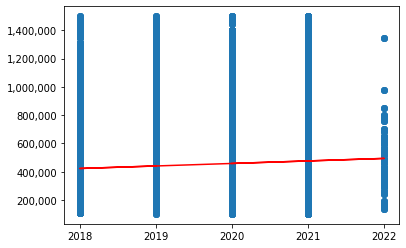

In [214]:
# Plot predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xticks(np.arange(min(df.SALE_YEAR), max(df.SALE_YEAR)+1, 1.0))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.show()